In [8]:
!pip install bs4
!pip install requests



In [1]:
# 1Write a python program to display all the header tags from wikipedia.org
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://en.wikipedia.org/wiki/Main_Page')
bs = BeautifulSoup(html,"html.parser")
titles = bs.find_all(['h1','h2','h3','h4','h5','h6','h7','h8'])
print('List all the headers tag :',*titles, sep='\n\n')

List all the headers tag :

<h1 class="firstHeading mw-first-heading" id="firstHeading" style="display: none"><span class="mw-page-title-main">Main Page</span></h1>

<h1><span class="mw-headline" id="Welcome_to_Wikipedia">Welcome to <a href="/wiki/Wikipedia" title="Wikipedia">Wikipedia</a></span></h1>

<h2 class="mp-h2" id="mp-tfa-h2"><span id="From_today.27s_featured_article"></span><span class="mw-headline" id="From_today's_featured_article">From today's featured article</span></h2>

<h2 class="mp-h2" id="mp-dyk-h2"><span class="mw-headline" id="Did_you_know_...">Did you know ...</span></h2>

<h2 class="mp-h2" id="mp-itn-h2"><span class="mw-headline" id="In_the_news">In the news</span></h2>

<h2 class="mp-h2" id="mp-otd-h2"><span class="mw-headline" id="On_this_day">On this day</span></h2>

<h2 class="mp-h2" id="mp-tfp-h2"><span id="Today.27s_featured_picture"></span><span class="mw-headline" id="Today's_featured_picture">Today's featured picture</span></h2>

<h2 class="mp-h2" id="mp

In [2]:
# 2 Write a python program to display IMDB’s Top rated 100 movies’ data (i.e. name, rating, year of release)and make data frame.


import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [5]:


topics=requests.get("https://www.imdb.com/search/title/?groups=top_100")



content=topics.text



content[:500]


doc = BeautifulSoup(topics.text,'html.parser')

doc.find('title')


def get_movie_titles(doc):
    
    selection_class="lister-item-header"
    movie_title_tags=doc.find_all('h3',{'class':selection_class})
    movie_titles=[]

    for tag in movie_title_tags:
        title = tag.find('a').text
        movie_titles.append(title)
        
        
    return movie_titles


titles = get_movie_titles(doc)


titles[:100]


def get_movie_rating(doc):
    rating_selector="inline-block ratings-imdb-rating"            
    movie_rating_tags=doc.find_all('div',{'class':rating_selector})
    movie_rating_tagss=[]
    for tag in movie_rating_tags:
        movie_rating_tagss.append(tag.get_text().strip())
    return movie_rating_tagss

ratings = get_movie_rating(doc)
ratings[:5]


def get_movie_year(doc):
    year_selector = "lister-item-year text-muted unbold"           
    movie_year_tags=doc.find_all('span',{'class':year_selector})
    movie_year_tagss=[]
    for tag in movie_year_tags:
        movie_year_tagss.append(tag.get_text().strip()[1:5])
    return movie_year_tagss


years = get_movie_year(doc)
years[:5]



def all_pages():
    movies_dict={
        'title':[],
        'rating':[],
        'year':[],
    }
  # We have to scrap more than one page so we want urls of all pages with the help of loop we can get all urls
    for i in range(1,2000,100):
       
        try:
            url = 'https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc&count=100&start='+str(i)+'&ref_=adv_next'
            response = requests.get(url)
        except:
            break
        
        if response.status_code != 200:
            break

        doc = BeautifulSoup(response.text, 'html.parser')
        titles = get_movie_titles(doc)
        ratings = get_movie_rating(doc)
        years = get_movie_year(doc)
        

        for i in range(len(titles)):
            movies_dict['title'].append(titles[i])
            movies_dict['rating'].append(ratings[i])
            movies_dict['year'].append(years[i])
        
    return pd.DataFrame(movies_dict)


movies_dict={
    'title':titles,
    'rating':ratings,
    'year':years,
}


df = pd.DataFrame(movies_dict)
df

title rating  year
0                                   Top Gun: Maverick    8.5  2022
1                                       The Godfather    9.2  1972
2                            The Shawshank Redemption    9.3  1994
3   The Lord of the Rings: The Fellowship of the Ring    8.8  2001
4                                        Interstellar    8.6  2014
5                                        Pulp Fiction    8.9  1994
6                                     The Dark Knight    9.0  2008
7                                   Avengers: Endgame    8.4  2019
8                                          Fight Club    8.8  1999
9                                           Inception    8.8  2010
10                                       Forrest Gump    8.8  1994
11                                           Whiplash    8.5  2014
12                                         Goodfellas    8.7  1990
13      The Lord of the Rings: The Return of the King    9.0  2003
14                                              Alien    8.5  1979
15                                              Joker    8.4  I) (
16                                              Se7en    8.6  1995
17                                       Gisaengchung    8.5  2019
18                               Inglourious Basterds    8.3  2009
19                                 Back to the Future    8.5  1985
20                                       The Departed    8.5  2006
21                           The Silence of the Lambs    8.6  1991
22                                          Gladiator    8.5  2000
23              The Lord of the Rings: The Two Towers    8.8  2002
24                                   Schindler's List    9.0  1993
25                              The Godfather Part II    9.0  1974
26                             Avengers: Infinity War    8.4  2018
27                                     Apocalypse Now    8.5  1979
28                                Requiem for a Dream    8.3  2000
29                              It's a Wonderful Life    8.6  1946
30                                   Django Unchained    8.4  2012
31                                               Léon    8.5  1994
32                                        The Shining    8.4  1980
33                              The Dark Knight Rises    8.4  2012
34                                         The Matrix    8.7  1999
35                                          Star Wars    8.6  1977
36                                       The Prestige    8.5  2006
37                                    American Beauty    8.4  1999
38                                     The Green Mile    8.6  1999
39                                            Memento    8.4  2000
40                                             Aliens    8.4  1986
41                  Spider-Man: Into the Spider-Verse    8.4  2018
42                                 American History X    8.5  1998
43                                  Good Will Hunting    8.3  1997
44                        Once Upon a Time in America    8.3  1984
45                        Witness for the Prosecution    8.4  1957
46                         Terminator 2: Judgment Day    8.6  1991
47                                             Psycho    8.5  1960
48                                       12 Angry Men    9.0  1957
49                                           Oldeuboi    8.4  2003

In [6]:
# 3 Write a python program to display IMDB’s Top rated 100 Indian movies’ data (i.e. name, rating, year ofrelease) and make data frame


In [7]:


url = 'https://www.imdb.com/india/top-rated-indian-movies/'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]

list =[]

for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            }
    list.append(data)
    

In [8]:
df.head(100)

title rating  year
0                                   Top Gun: Maverick    8.5  2022
1                                       The Godfather    9.2  1972
2                            The Shawshank Redemption    9.3  1994
3   The Lord of the Rings: The Fellowship of the Ring    8.8  2001
4                                        Interstellar    8.6  2014
5                                        Pulp Fiction    8.9  1994
6                                     The Dark Knight    9.0  2008
7                                   Avengers: Endgame    8.4  2019
8                                          Fight Club    8.8  1999
9                                           Inception    8.8  2010
10                                       Forrest Gump    8.8  1994
11                                           Whiplash    8.5  2014
12                                         Goodfellas    8.7  1990
13      The Lord of the Rings: The Return of the King    9.0  2003
14                                              Alien    8.5  1979
15                                              Joker    8.4  I) (
16                                              Se7en    8.6  1995
17                                       Gisaengchung    8.5  2019
18                               Inglourious Basterds    8.3  2009
19                                 Back to the Future    8.5  1985
20                                       The Departed    8.5  2006
21                           The Silence of the Lambs    8.6  1991
22                                          Gladiator    8.5  2000
23              The Lord of the Rings: The Two Towers    8.8  2002
24                                   Schindler's List    9.0  1993
25                              The Godfather Part II    9.0  1974
26                             Avengers: Infinity War    8.4  2018
27                                     Apocalypse Now    8.5  1979
28                                Requiem for a Dream    8.3  2000
29                              It's a Wonderful Life    8.6  1946
30                                   Django Unchained    8.4  2012
31                                               Léon    8.5  1994
32                                        The Shining    8.4  1980
33                              The Dark Knight Rises    8.4  2012
34                                         The Matrix    8.7  1999
35                                          Star Wars    8.6  1977
36                                       The Prestige    8.5  2006
37                                    American Beauty    8.4  1999
38                                     The Green Mile    8.6  1999
39                                            Memento    8.4  2000
40                                             Aliens    8.4  1986
41                  Spider-Man: Into the Spider-Verse    8.4  2018
42                                 American History X    8.5  1998
43                                  Good Will Hunting    8.3  1997
44                        Once Upon a Time in America    8.3  1984
45                        Witness for the Prosecution    8.4  1957
46                         Terminator 2: Judgment Day    8.6  1991
47                                             Psycho    8.5  1960
48                                       12 Angry Men    9.0  1957
49                                           Oldeuboi    8.4  2003

In [9]:

for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'],')','-', movie['rating'])
    

1 - Rocketry: The Nambi Effect (2022 ) - 8.526456189618104
2 - Anbe Sivam (2003 ) - 8.399740275032794
3 - Golmaal (1979 ) - 8.391261455040185
4 - Nayakan (1987 ) - 8.388370444383215
5 - Jai Bhim (2021 ) - 8.383556081437096
6 - Pariyerum Perumal (2018 ) - 8.375336896331959
7 - 3 Idiots (2009 ) - 8.350751262789752
8 - Apur Sansar (1959 ) - 8.34800452447599
9 - Manichitrathazhu (1993 ) - 8.330986014474695
1 -  777 Charlie (2022 ) - 8.324543105522139
11 - Kumbalangi Nights (2019 ) - 8.316179510701122
12 - Black Friday (2004 ) - 8.313191300787228
13 - C/o Kancharapalem (2018 ) - 8.30548193706969
14 - Soorarai Pottru (2020 ) - 8.303691013002142
15 - #Home (2021 ) - 8.303427834649348
16 - Taare Zameen Par (2007 ) - 8.29899491977067
17 - Kireedam (1989 ) - 8.286815232416638
18 - Dangal (2016 ) - 8.281727550262694
19 - Kaithi (2019 ) - 8.278774626615602
20 - Jersey (2019 ) - 8.270095536073201
21 - 96 (2018 ) - 8.245492219679084
22 - Asuran (2019 ) - 8.243931373257318
23 - Thevar Magan (1992 ) -

In [10]:

df = pd.DataFrame(list)
df.to_csv('imdb_top__movies.csv',index=False)

In [11]:
df

place                 movie_title             rating  year
0       1  Rocketry: The Nambi Effect  8.526456189618104  2022
1       2                  Anbe Sivam  8.399740275032794  2003
2       3                     Golmaal  8.391261455040185  1979
3       4                     Nayakan  8.388370444383215  1987
4       5                    Jai Bhim  8.383556081437096  2021
..    ...                         ...                ...   ...
245   246                         Don  7.648971879102423  1978
246   247          Ennu Ninte Moideen  7.645718436889903  2015
247   248                     Aligarh  7.644748333124972  2015
248   249        Velaiilla Pattadhari  7.643542766886998  2014
249   250                Colour Photo  7.640982712665025  2020

[250 rows x 4 columns]

In [12]:

df.head(100)

place                  movie_title             rating  year
0      1   Rocketry: The Nambi Effect  8.526456189618104  2022
1      2                   Anbe Sivam  8.399740275032794  2003
2      3                      Golmaal  8.391261455040185  1979
3      4                      Nayakan  8.388370444383215  1987
4      5                     Jai Bhim  8.383556081437096  2021
..   ...                          ...                ...   ...
95    96                       Angoor  8.016714502180037  1982
96    97              Rang De Basanti  8.013556265160146  2006
97    98  Baahubali 2: The Conclusion  8.013381645492222  2017
98    99                       Baasha  8.013068057404974  1995
99    10                    Virumandi  8.012477587772294  2004

[100 rows x 4 columns]

In [ ]:
# 4 Write s python program to display list of respected former presidents of India(i.e. Name , Term of office

In [13]:

page = requests.get('https://presidentofindia.nic.in/former-presidents.htm')
page


<Response [200]>

In [14]:

soup = BeautifulSoup(page.content)

In [15]:

soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head id="Head1">
  <title>
   Former Presidents - The President of India
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <!--<meta http-equiv="Content-Style-Type" content="text/css" /><meta http-equiv="Content-Script-Type" content="type" />-->
  <meta content="telephone=no" name="format-detection"/>
  <meta content="IE=EmulateIE10" http-equiv="X-UA-Compatible"/>
  <!-- Start Favicon -->
  <link href="favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="js/panorama_viewer.css" rel="stylesheet" type="text/css"/>
  <!-- Start Viewport -->
  <!--<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" />-->
  <!-- Start IE CSS -->
  <!--[if IE]>
	<link href

In [16]:

scraped_formerPresidents = soup.find_all('div',class_='presidentListing')
scraped_formerPresidents


[<div class="presidentListing">
 <h3>Shri Ram Nath Kovind (birth - 1945)</h3>
 <p><span class="terms">Term of Office:</span> 25 July, 2017 to 25 July, 2022 </p>
 <p><a href="https://ramnathkovind.nic.in" target="_blank">https://ramnathkovind.nic.in</a></p>
 </div>,
 <div class="presidentListing">
 <h3>Shri Pranab Mukherjee (1935-2020)</h3>
 <p><span class="terms">Term of Office:</span> 25 July, 2012 to 25 July, 2017 </p>
 <p><a href="http://pranabmukherjee.nic.in" target="_blank">http://pranabmukherjee.nic.in</a></p>
 </div>,
 <div class="presidentListing">
 <h3>Smt Pratibha Devisingh Patil (birth - 1934)</h3>
 <p><span class="terms">Term of Office:</span> 25 July, 2007 to 25 July, 2012 </p>
 <p><a href="http://pratibhapatil.nic.in" target="_blank">http://pratibhapatil.nic.in</a></p>
 </div>,
 <div class="presidentListing">
 <h3>DR. A.P.J. Abdul Kalam (1931-2015)</h3>
 <p><span class="terms">Term of Office:</span> 25 July, 2002 to 25 July, 2007 </p>
 <p><a href="http://abdulkalam.nic.i

In [17]:

formerPresidents = []
for formerPresident in scraped_formerPresidents:
    print(formerPresident.get_text())


Shri Ram Nath Kovind (birth - 1945)
Term of Office: 25 July, 2017 to 25 July, 2022 
https://ramnathkovind.nic.in


Shri Pranab Mukherjee (1935-2020)
Term of Office: 25 July, 2012 to 25 July, 2017 
http://pranabmukherjee.nic.in


Smt Pratibha Devisingh Patil (birth - 1934)
Term of Office: 25 July, 2007 to 25 July, 2012 
http://pratibhapatil.nic.in


DR. A.P.J. Abdul Kalam (1931-2015)
Term of Office: 25 July, 2002 to 25 July, 2007 
http://abdulkalam.nic.in


Shri K. R. Narayanan (1920 - 2005)
Term of Office: 25 July, 1997 to 25 July, 2002 


Dr Shankar Dayal Sharma (1918-1999)
Term of Office: 25 July, 1992 to 25 July, 1997 


Shri R Venkataraman (1910-2009)
Term of Office: 25 July, 1987 to 25 July, 1992 


Giani Zail Singh (1916-1994)
Term of Office: 25 July, 1982 to 25 July, 1987 


Shri Neelam Sanjiva Reddy (1913-1996)
Term of Office: 25 July, 1977 to 25 July, 1982 


Dr. Fakhruddin Ali Ahmed (1905-1977)
Term of Office: 24 August, 1974 to 11 February, 1977


Shri Varahagiri Venkata Gi

In [ ]:
# 5 ) Write a python program to scrape cricket rankings from icc-cricket.com. You have to scrape:
a) Top 10 ODI teams in men’s cricket along with the records for matches, points and rating.
b) Top 10 ODI Batsmen along with the records of their team and rating.
c) Top 10 ODI bowlers along with the records of their team and rating.

In [18]:


page = requests.get('https://www.icc-cricket.com/rankings/mens/team-rankings/odi')
page


<Response [200]>

In [19]:

soup = BeautifulSoup(page.content)
soup


<!DOCTYPE html>
<html lang="en">
<head>
<meta content="ICC Men's ODI Team Rankings | ICC" name="twitter:title"/>
<meta content="website" property="og:type"/>
<meta content="summary_large_image" property="twitter:card"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
<meta content="@icc" property="twitter:site"/>
<meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
<meta content="ICC Men's ODI Team Rankings | ICC" property="og:title"/>
<meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-t

In [26]:

soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="ICC Men's ODI Team Rankings | ICC" name="twitter:title"/>
  <meta content="website" property="og:type"/>
  <meta content="summary_large_image" property="twitter:card"/>
  <meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="description"/>
  <meta content="@icc" property="twitter:site"/>
  <meta content="Official International Cricket Council ranking for One Day International (ODI) cricket teams. Discover latest ICC rankings table, predict upcoming matches, see points and ratings for all teams." name="twitter:description"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i/elements/default-thumbnail.jpg" name="twitter:image"/>
  <meta content="ICC Men's ODI Team Rankings | ICC" property="og:title"/>
  <meta content="https://www.icc-cricket.com/resources/ver/i

In [ ]:
 soup.find_all('div',class_='presidentListing')

In [ ]:
# 7 ) Write a python program to scrape mentioned news details from https://www.cnbc.com/world/?region=world :
i) Headline
ii) Time
iii) News Lin

In [27]:

page = requests.get('https://www.cnbc.com/world/?region=world')
page


<Response [200]>

In [28]:

soup = BeautifulSoup(page.content)
soup


<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#"><head><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_0_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_1_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_2_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_4_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-rede

In [29]:


soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())



<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#">
 <head>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" rel="preload" type="font/ttf"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_0_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_1_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_2_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_4_0.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="anonymous" hr

In [30]:

for link in soup.findAll("a"):
    print("Headlines : {}".format(link.text))


Headlines : Skip Navigation
Headlines : 
Headlines : 
Headlines : Markets
Headlines : Pre-Markets
Headlines : U.S. Markets
Headlines : Europe Markets
Headlines : China Markets
Headlines : Asia Markets
Headlines : World Markets
Headlines : Currencies
Headlines : Cryptocurrency
Headlines : Futures & Commodities
Headlines : Bonds
Headlines : Funds & ETFs
Headlines : Business
Headlines : Economy
Headlines : Finance
Headlines : Health & Science
Headlines : Media
Headlines : Real Estate
Headlines : Energy
Headlines : Climate
Headlines : Transportation
Headlines : Industrials
Headlines : Retail
Headlines : Wealth
Headlines : Life
Headlines : Small Business
Headlines : Investing
Headlines : Personal Finance
Headlines : Fintech
Headlines : Financial Advisors
Headlines : Options Action
Headlines : ETF Street
Headlines : Buffett Archive
Headlines : Earnings
Headlines : Trader Talk
Headlines : Tech
Headlines : Cybersecurity
Headlines : Enterprise
Headlines : Internet
Headlines : Media
Headlines : 

In [31]:

for link in soup.findAll('time',{'class' : 'LatestNews-timestamp'}):
    print("Times : {}".format(link.text))



Times : 38 Min Ago
Times : 1 Hour Ago
Times : 13 Hours Ago
Times : 14 Hours Ago
Times : 14 Hours Ago
Times : 14 Hours Ago
Times : 15 Hours Ago
Times : 15 Hours Ago
Times : 15 Hours Ago
Times : 15 Hours Ago
Times : 16 Hours Ago
Times : 16 Hours Ago
Times : 16 Hours Ago
Times : 16 Hours Ago
Times : 16 Hours Ago
Times : 17 Hours Ago
Times : 17 Hours Ago
Times : 18 Hours Ago
Times : 18 Hours Ago
Times : 18 Hours Ago
Times : 18 Hours Ago
Times : 18 Hours Ago
Times : 18 Hours Ago
Times : 18 Hours Ago
Times : 18 Hours Ago
Times : 18 Hours Ago
Times : 19 Hours Ago
Times : 19 Hours Ago
Times : 19 Hours Ago
Times : 19 Hours Ago


In [32]:
cnbc_url="https://www.cnbc.com/world"

In [34]:

page = requests.get('https://www.cnbc.com/world')
page


<Response [200]>

In [35]:

soup = BeautifulSoup(page.content)
soup


<!DOCTYPE html>
<html itemscope="" itemtype="https://schema.org/WebPage" lang="en" prefix="og=https://ogp.me/ns#"><head><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/icomoon.ttf" rel="preload" type="font/ttf"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_0_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_1_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_2_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_3_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-redesign.cnbcfm.com/dist/351C86_4_0.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://static-rede

In [36]:

links_list = soup.find_all('a')

In [37]:

for link in links_list:
    if 'href'in link.attrs:
        print(str(link.attrs['href']))

#MainContent
//www.cnbc.com/world/
/
/markets/
/pre-markets/
/us-markets/
/markets-europe/
/china-markets/
/markets-asia-pacific/
/world-markets/
/currencies/
/cryptocurrency/
/futures-and-commodities/
/bonds/
/funds-and-etfs/
/business/
/economy/
/finance/
/health-and-science/
/media/
/real-estate/
/energy/
/climate/
/transportation/
/industrials/
/retail/
/wealth/
/life/
/small-business/
/investing/
/personal-finance/
/fintech/
/financial-advisors/
/options-action/
/etf-street/
https://buffett.cnbc.com
/earnings/
/trader-talk/
/technology/
/cybersecurity/
/enterprise/
/internet/
/media/
/mobile/
/social-media/
/cnbc-disruptors/
/tech-guide/
/politics/
/white-house/
/policy/
/defense/
/congress/
/equity-opportunity/
/europe-politics/
/china-politics/
/asia-politics/
/world-politics/
/tv/
/live-audio/
/latest-video/
/top-video/
/video-ceo-interviews/
/europe-television/
/asia-business-day/
/podcast/
/digital-original/
/watchlist/
/investingclub/
/investingclub/cramer-trade-alert/
/inve

In [ ]:
# 8 ) Write a python program to scrape the details of most downloaded articles from AI in last 90 days. 
https://www.journals.elsevier.com/artificial-intelligence/most-downloaded-articles
Scrape below mentioned details :
i) Paper Title 
ii) Authors
iii) Published Date 
iv) Paper URL

In [38]:

from bs4 import BeautifulSoup
import requests
import re
import pandas as pd


In [39]:

page = requests.get('https://www.journals.elsevier.com/artificial-intelligence/most-downloaded-articles')
page


<Response [200]>

In [40]:

soup = BeautifulSoup(page.content)
soup


<!DOCTYPE html>
<html><head><link as="font" crossorigin="" href="/fonts/NexusSansWebPro-Regular.woff2" rel="preload" type="font/woff2"/><link as="font" crossorigin="" href="/fonts/ElsevierGulliver-Regular.woff2" rel="preload" type="font/woff2"/><script src="//assets.adobedtm.com/4a848ae9611a/4da1513b0562/launch-a536f9fbceee.min.js"></script><meta name="next-font-preconnect"/><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><meta content="en_US" name="og:locale"/><meta content="Most Downloaded Articles - Artificial Intelligence - Journal - Elsevier" property="og:title"/><meta content="The journal of Artificial Intelligence (AIJ)  welcomes papers on broad aspects of AI that constitute advances in the overall field including, but not limited …" property="og:description"/><meta content="http://ars.els-cdn.com/content/image/X00043702.jpg" name="og:image" property="og:image"/><meta content="http://ars.els-cdn.com/content/image/X00043702.jpg" name="og:image:url" prop

In [41]:

soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())


<!DOCTYPE html>
<html>
 <head>
  <link as="font" crossorigin="" href="/fonts/NexusSansWebPro-Regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/fonts/ElsevierGulliver-Regular.woff2" rel="preload" type="font/woff2"/>
  <script src="//assets.adobedtm.com/4a848ae9611a/4da1513b0562/launch-a536f9fbceee.min.js">
  </script>
  <meta name="next-font-preconnect"/>
  <meta content="width=device-width" name="viewport"/>
  <meta charset="utf-8"/>
  <meta content="en_US" name="og:locale"/>
  <meta content="Most Downloaded Articles - Artificial Intelligence - Journal - Elsevier" property="og:title"/>
  <meta content="The journal of Artificial Intelligence (AIJ)  welcomes papers on broad aspects of AI that constitute advances in the overall field including, but not limited …" property="og:description"/>
  <meta content="http://ars.els-cdn.com/content/image/X00043702.jpg" name="og:image" property="og:image"/>
  <meta content="http://ars.els-cdn.com/content/image/X

In [42]:

for link in soup.findAll("h2"):
    print("PaperTitle : {}".format(link.text))


PaperTitle : Reward is enough
PaperTitle : Making sense of raw input
PaperTitle : Law and logic: A review from an argumentation perspective
PaperTitle : Creativity and artificial intelligence
PaperTitle : Artificial cognition for social human–robot interaction: An implementation
PaperTitle : Explanation in artificial intelligence: Insights from the social sciences
PaperTitle : Making sense of sensory input
PaperTitle : Conflict-based search for optimal multi-agent pathfinding
PaperTitle : Between MDPs and semi-MDPs: A framework for temporal abstraction in reinforcement learning
PaperTitle : The Hanabi challenge: A new frontier for AI research
PaperTitle : Evaluating XAI: A comparison of rule-based and example-based explanations
PaperTitle : Argumentation in artificial intelligence
PaperTitle : Algorithms for computing strategies in two-player simultaneous move games
PaperTitle : Multiple object tracking: A literature review
PaperTitle : Selection of relevant features and examples in ma

In [43]:

author = []

for i in soup.find_all('span',{'class' : "sc-1w3fpd7-0 pgLAT"}):
    author.append(i.text)

author

['Silver, David, Singh, Satinder, Precup, Doina, Sutton, Richard S. ',
 'Evans, Richard, Bošnjak, Matko and 5 more',
 'Prakken, Henry, Sartor, Giovanni ',
 'Boden, Margaret A. ',
 'Lemaignan, Séverin, Warnier, Mathieu and 3 more',
 'Miller, Tim ',
 'Evans, Richard, Hernández-Orallo, José and 3 more',
 'Sharon, Guni, Stern, Roni, Felner, Ariel, Sturtevant, Nathan R. ',
 'Sutton, Richard S., Precup, Doina, Singh, Satinder ',
 'Bard, Nolan, Foerster, Jakob N. and 13 more',
 'van der Waa, Jasper, Nieuwburg, Elisabeth, Cremers, Anita, Neerincx, Mark ',
 'Bench-Capon, T.J.M., Dunne, Paul E. ',
 'Bošanský, Branislav, Lisý, Viliam and 3 more',
 'Luo, Wenhan, Xing, Junliang and 4 more',
 'Blum, Avrim L., Langley, Pat ',
 'Arora, Saurabh, Doshi, Prashant ',
 'Aas, Kjersti, Jullum, Martin, Løland, Anders ',
 'Kliegr, Tomáš, Bahník, Štěpán, Fürnkranz, Johannes ',
 'Pereira, Gonçalo, Prada, Rui, Santos, Pedro A. ',
 'Riveiro, Maria, Thill, Serge ',
 'Kenny, Eoin M., Ford, Courtney, Quinn, Molly, Ke

In [44]:

date = []

for i in soup.find_all('span',{'class' : 'sc-1thf9ly-2 bKddwo'}):
    date.append(i.text)


In [45]:
date

['October 2021',
 'October 2021',
 'October 2015',
 'August 1998',
 'June 2017',
 'February 2019',
 'April 2021',
 'February 2015',
 'August 1999',
 'March 2020',
 'February 2021',
 'October 2007',
 'August 2016',
 'April 2021',
 'December 1997',
 'August 2021',
 'September 2021',
 'June 2021',
 'December 2016',
 'September 2021',
 'May 2021',
 'January 2014',
 'December 1997',
 'October 2021',
 'February 2010']

In [46]:

url = "https://www.journals.elsevier.com"


In [47]:

page = requests.get('https://www.journals.elsevier.com') 
page


<Response [200]>

<!DOCTYPE html>
<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Elsevier" name="author"/>
<meta content="0-8Ig3YtfzbeUxQdZ-TM_y8P_se41D4JrW3e0o8xgdk" name="google-site-verification"/>
<meta content="#da532c" name="msapplication-TileColor"/>
<meta content="//design.elsevier.com/public/icon-set/elsevier/favicon-32px.svg" name="msapplication-TileImage"/>
<meta content="unsafe-url" name="referrer"/>
<meta content="144399" name="asssetID"/>
<!-- Preconnect -->
<link crossorigin="" href="https://cdn.cookielaw.org" rel="preconnect"/>
<link crossorigin="" href="https://cdn.elsevier.io" rel="preconnect"/>
<link href="https://assets.adobedtm.com" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/>
<link href="https://dpm.demdex.net" rel="preconnect"/>
<link href="https://cm.everesttech.net" rel="preconnect"/>
<
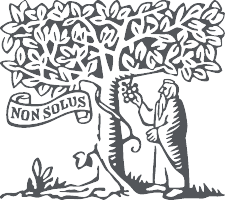
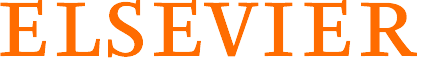

In [48]:

soup = BeautifulSoup(page.content)
soup


<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <meta content="Elsevier" name="author"/>
   <meta content="0-8Ig3YtfzbeUxQdZ-TM_y8P_se41D4JrW3e0o8xgdk" name="google-site-verification">
    <meta content="#da532c" name="msapplication-TileColor"/>
    <meta content="//design.elsevier.com/public/icon-set/elsevier/favicon-32px.svg" name="msapplication-TileImage"/>
    <meta content="unsafe-url" name="referrer"/>
    <meta content="144399" name="asssetID"/>
    <!-- Preconnect -->
    <link crossorigin="" href="https://cdn.cookielaw.org" rel="preconnect"/>
    <link crossorigin="" href="https://cdn.elsevier.io" rel="preconnect"/>
    <link href="https://assets.adobedtm.com" rel="preconnect"/>
    <link href="https://www.googletagmanager.com" rel="preconnect"/>
    <link href="https://dpm.demdex.net" rel="preconnect"/>
    <link
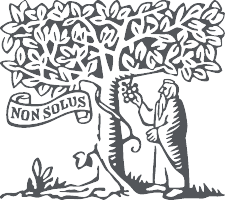
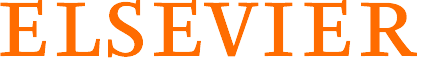

In [49]:

soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())



In [50]:

links_list = soup.find_all('a')



In [51]:

for link in links_list:
    if 'href'in link.attrs:
        print(str(link.attrs['href']))

#maincontent
https://www.elsevier.com
https://www.elsevier.com/about
https://www.elsevier.com/about
https://www.elsevier.com/connect
/about/careers
https://www.elsevier.com/open-science
https://www.elsevier.com/solutions
https://www.elsevier.com/rd-solutions
https://www.elsevier.com/clinical-solutions
https://www.elsevier.com/research-platforms
https://www.elsevier.com/research-intelligence
https://www.elsevier.com/education
https://www.elsevier.com/solutions
https://www.elsevier.com/authors
https://www.elsevier.com/editors
https://www.elsevier.com/reviewers
https://www.elsevier.com/librarians
https://www.elsevier.com/strategic-partners
https://www.elsevier.com/open-access
https://www.elsevier.com/societies
https://www.elsevier.com/books-and-journals
https://www.elsevier.com/books-and-journals
https://webshop.elsevier.com/?utm_source=ecom&utm_medium=top&utm_campaign=webshop
https://www.elsevier.com/search-results
https://www.elsevier.com/support
https://global-checkout.elsevier.com
htt

In [ ]:
# 9 Write a python program to scrape mentioned details from dineout.co.in :
i) Restaurant name
ii) Cuisine
iii) Location 
iv) Ratings
v) Image URL

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [52]:
page = requests.get('https://www.dineout.co.in/delhi-restaurants/buffet-special')
page

<Response [200]>

In [53]:
soup = BeautifulSoup(page.content)
soup


<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><style type="text/css">
            @font-face {
                font-family: 'dineicon';
                src:  url('/fonts/dineicon.eot');
                src:  url('/fonts/dineicon.eot#iefix') format('embedded-opentype'),
                url('/fonts/dineicon.ttf') format('truetype'),
                url('/fonts/dineicon.woff') format('woff'),
                url('/fonts/dineicon.svg#dineicon') format('svg');
                font-weight: normal;
				font-style: normal;
				font-display: swap;
            }
            .hide {
                display: none !important;
            }
            .async-hide{
                opacity: inherit !important;
            }
            iframe[name="google_conversion_frame"]{
        

In [54]:
names = []

for i in soup.find_all('div',class_="restnt-info cursor"):
    names.append(i.text)
    
names

['Castle BarbequeConnaught Place, Central Delhi',
 'Jungle Jamboree3CS Mall,Lajpat Nagar - 3, South Delhi',
 'Castle BarbequePacific Mall,Tagore Garden, West Delhi',
 'Cafe KnoshThe Leela Ambience Convention Hotel,Shahdara, East Delhi',
 'The Barbeque CompanyGardens Galleria,Sector 38A, Noida',
 'India GrillHilton Garden Inn,Saket, South Delhi',
 'Delhi BarbequeTaurus Sarovar Portico,Mahipalpur, South Delhi',
 'The Monarch - Bar Be Que VillageIndirapuram Habitat Centre,Indirapuram, Ghaziabad',
 'Indian Grill RoomSuncity Business Tower,Golf Course Road, Gurgaon']

In [55]:
locations = []

for i in soup.find_all('div',class_="restnt-loc ellipsis"):
    locations.append(i.text)
    
locations

['Connaught Place, Central Delhi',
 '3CS Mall,Lajpat Nagar - 3, South Delhi',
 'Pacific Mall,Tagore Garden, West Delhi',
 'The Leela Ambience Convention Hotel,Shahdara, East Delhi',
 'Gardens Galleria,Sector 38A, Noida',
 'Hilton Garden Inn,Saket, South Delhi',
 'Taurus Sarovar Portico,Mahipalpur, South Delhi',
 'Indirapuram Habitat Centre,Indirapuram, Ghaziabad',
 'Suncity Business Tower,Golf Course Road, Gurgaon']

In [56]:
price = []

for i in soup.find_all('span',class_="double-line-ellipsis"):
    price.append(i.text)
    
price

['₹ 2,000 for 2 (approx) | Chinese, North Indian',
 '₹ 1,680 for 2 (approx) | North Indian, Asian, Italian',
 '₹ 2,000 for 2 (approx) | Chinese, North Indian',
 '₹ 3,000 for 2 (approx) | Italian, Continental',
 '₹ 1,700 for 2 (approx) | North Indian, Chinese',
 '₹ 2,400 for 2 (approx) | North Indian, Italian',
 '₹ 1,800 for 2 (approx) | North Indian',
 '₹ 1,900 for 2 (approx) | North Indian',
 '₹ 2,200 for 2 (approx) | North Indian, Mughlai']

In [57]:
images = []

for i in soup.find_all("img",class_="no-img"):
    images.append(i['data-src'])
    
images

['https://im1.dineout.co.in/images/uploads/restaurant/sharpen/8/k/b/p86792-16062953735fbe1f4d3fb7e.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/5/p/m/p59633-166088382462ff137009010.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/j/o/p38113-15959192065f1fcb666130c.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/4/p/m/p406-15438184745c04ccea491bc.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/7/p/k/p79307-16051787755fad1597f2bf9.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/2/v/t/p2687-1482477169585cce712b90f.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/5/d/i/p52501-1661855212630de5eceb6d2.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/restaurant/sharpen/3/n/o/p34822-15599107305cfa594a13c24.jpg?tr=tr:n-medium',
 'https://im1.dineout.co.in/images/uploads/

In [58]:
import pandas as pd
df = pd.DataFrame({'Names':names,'Locations':locations,'Price and Cuisine':price,'Images_url':images})
df

Names  \
0      Castle BarbequeConnaught Place, Central Delhi   
1  Jungle Jamboree3CS Mall,Lajpat Nagar - 3, Sout...   
2  Castle BarbequePacific Mall,Tagore Garden, Wes...   
3  Cafe KnoshThe Leela Ambience Convention Hotel,...   
4  The Barbeque CompanyGardens Galleria,Sector 38...   
5    India GrillHilton Garden Inn,Saket, South Delhi   
6  Delhi BarbequeTaurus Sarovar Portico,Mahipalpu...   
7  The Monarch - Bar Be Que VillageIndirapuram Ha...   
8  Indian Grill RoomSuncity Business Tower,Golf C...   

                                           Locations  \
0                     Connaught Place, Central Delhi   
1             3CS Mall,Lajpat Nagar - 3, South Delhi   
2             Pacific Mall,Tagore Garden, West Delhi   
3  The Leela Ambience Convention Hotel,Shahdara, ...   
4                 Gardens Galleria,Sector 38A, Noida   
5               Hilton Garden Inn,Saket, South Delhi   
6     Taurus Sarovar Portico,Mahipalpur, South Delhi   
7  Indirapuram Habitat Centre,Indirapuram, Ghaziabad   
8   Suncity Business Tower,Golf Course Road, Gurgaon   

                                   Price and Cuisine  \
0     ₹ 2,000 for 2 (approx) | Chinese, North Indian   
1  ₹ 1,680 for 2 (approx) | North Indian, Asian, ...   
2     ₹ 2,000 for 2 (approx) | Chinese, North Indian   
3      ₹ 3,000 for 2 (approx) | Italian, Continental   
4     ₹ 1,700 for 2 (approx) | North Indian, Chinese   
5     ₹ 2,400 for 2 (approx) | North Indian, Italian   
6              ₹ 1,800 for 2 (approx) | North Indian   
7              ₹ 1,900 for 2 (approx) | North Indian   
8     ₹ 2,200 for 2 (approx) | North Indian, Mughlai   

                                          Images_url  
0  https://im1.dineout.co.in/images/uploads/resta...  
1  https://im1.dineout.co.in/images/uploads/resta...  
2  https://im1.dineout.co.in/images/uploads/resta...  
3  https://im1.dineout.co.in/images/uploads/resta...  
4  https://im1.dineout.co.in/images/uploads/resta...  
5  https://im1.dineout.co.in/images/uploads/resta...  
6  https://im1.dineout.co.in/images/uploads/resta...  
7  https://im1.dineout.co.in/images/uploads/resta...  
8  https://im1.dineout.co.in/images/uploads/resta...